In [2]:
#Data Analysis Project — Telco Customer Churn
1. How long did unsubscribed people who are paying for the service usually stay in the service? And what was their average
LTV(Life Time Value)?
2. How many of those who unsubscribed and still subscribe used the phone service?
3. How many people use phone services with multiple lines for those who unsubscribed and still subscribe?
4. How many people used the internet service for those who unsubscribed and subscribed?
5. How many people used and using each subset of internet service for those who unsubscribed and who are paying for the service?
6. What are the differences in each service internet service for those who are still in service with LTV higher than the 
average LTV of leaked customers,?
7. How many subscribed to each kind of contract for those who unsubscribed and still are paying for the service,?
8. Among ‘gender’, ‘Partner’, ‘Dependents’,’PhoneService’, ‘InternetService’, ‘contract’, and ‘PaymentMethod’,
which variables affected the LTV the most?


SyntaxError: invalid syntax (622817385.py, line 2)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

In [4]:
df=pd.read_csv(r"D:\csv data\tele\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
df.describe()               #it will show only numerical value
#df.describe(include='all')      #It will show all numerical and categorical data,.T in tabular form

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#senior citizen is categorical hence 25%,50%,75% distribution is not proper
75% customer have tenure less than 55%
avg manthly charge is 64.76 whereas 75% pay more than 89.85

In [9]:
#1. How long did unsubscribed people who are paying for the service usually stay in the service? And what was their average
#LTV(Life Time Value)?
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

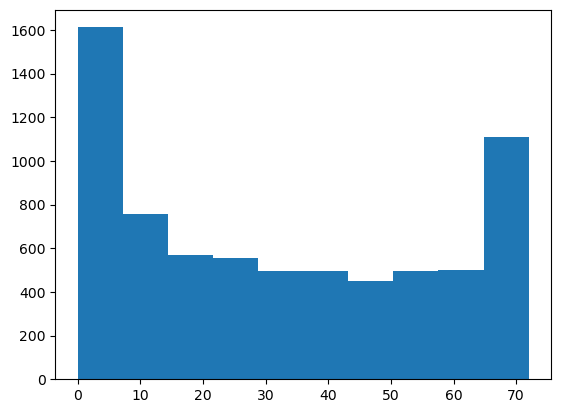

In [10]:
from matplotlib import pyplot as plt
plt.hist (data=df,x='tenure')

In [11]:
df1=df['TotalCharges'].describe()


In [12]:
df1.describe()

count        4
unique       4
top       7043
freq         1
Name: TotalCharges, dtype: int64

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
churnrate=df['Churn'].value_counts()/df.shape[0]

In [15]:
churnrate

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [16]:
df2=df['Churn'].map({'Yes':1,'No':0})

(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1869.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

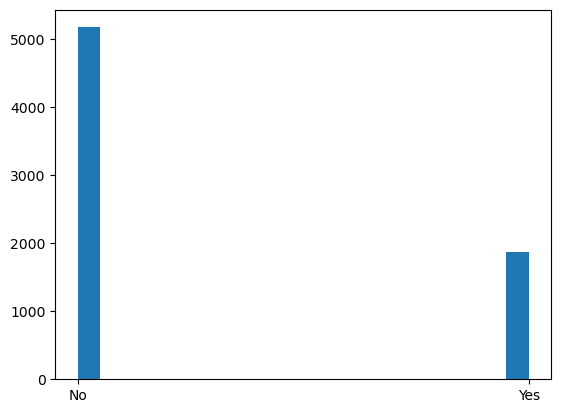

In [17]:
plt.hist(df['Churn'],bins=20)

# Analysis shows that Churn rate of the Telecom company is around 26%.churn rate 
Churn rate = # of Churn customers / # of total customers
No     0.73463
Yes    0.26537
concise summary of df with other feature taking target values seprately to get some insights

In [26]:
churnrate.info(verbose=True)

<class 'pandas.core.series.Series'>
Index: 2 entries, No to Yes
Series name: Churn
Non-Null Count  Dtype  
--------------  -----  
2 non-null      float64
dtypes: float64(1)
memory usage: 140.0+ bytes


In [18]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
df.nunique()            #unique value in all columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [24]:
len(df[df.duplicated()])   #to check duplicate value

0

Missing value check
Data cleaning
1.create copy of base data for manipulation and processing
2.Total charge should be numeric amount lets convert it to numerical data type

In [27]:
tele_data=df.copy()

In [29]:
tele_data.TotalCharges=pd.to_numeric(tele_data.TotalCharges, errors='coerce')
tele_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
#sometimes in object null value is not shown but when we convert it into numeric it will show null values we got 11 null value
tele_data.loc[tele_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [34]:
#The analysis shows 11 missing values for “TotalCharges”. The respective data entries (=rows) will be deleted for simplicity.
tele_data.dropna(how='any',inplace=True)

In [35]:
tele_data['tenure'].max()

72

In [37]:
#group the tenure in bins of 12 months
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
tele_data['new_tenure']=pd.cut(tele_data.tenure,range(1,80,12),right=False,labels=labels)

In [38]:
tele_data['new_tenure'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: new_tenure, dtype: int64

In [40]:
tele_data.drop(['customerID','tenure'],axis=1,inplace=True)

Data Exploration
1.plot distribution of  individual predictors by churn
UNIVARIATE ANALYSIS

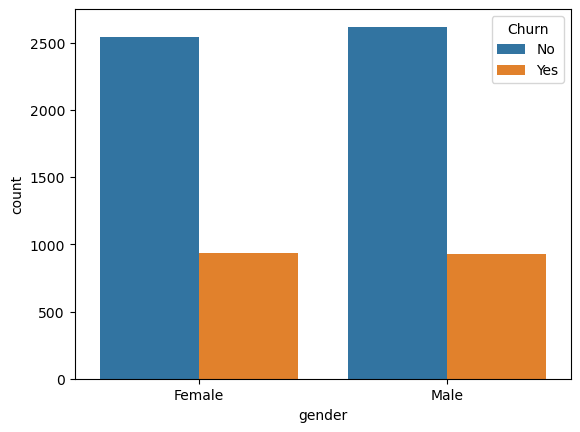

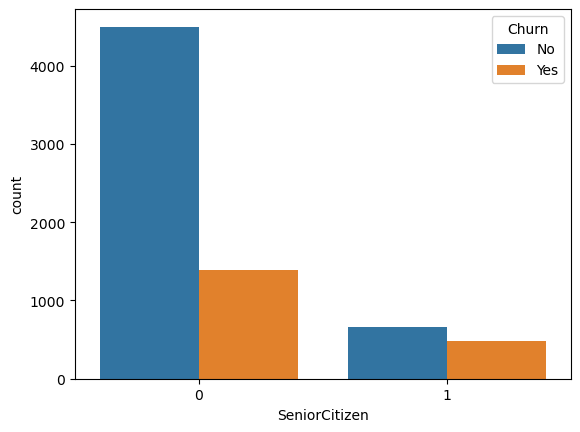

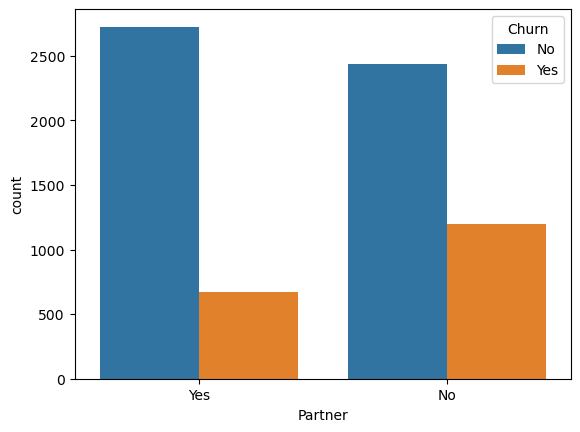

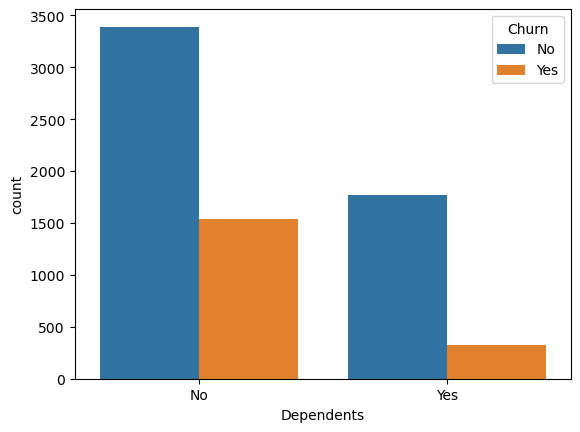

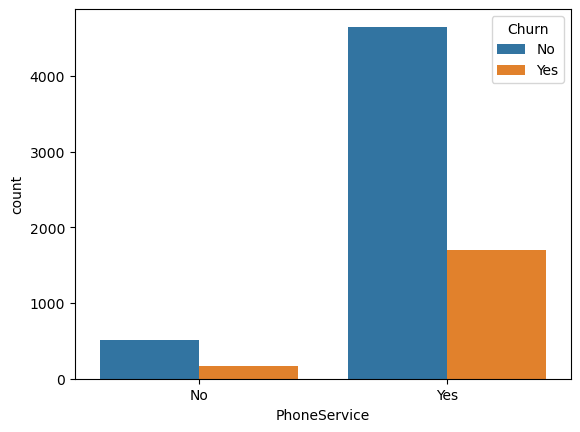

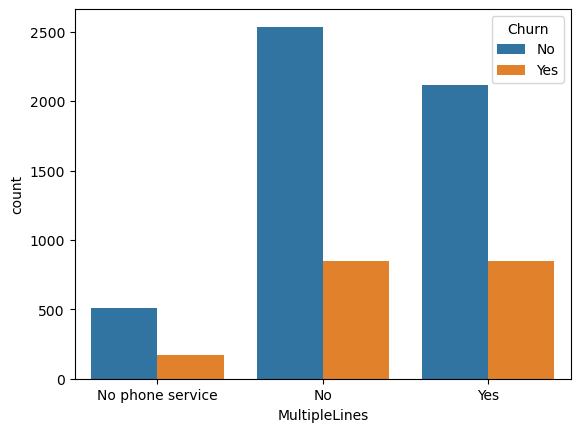

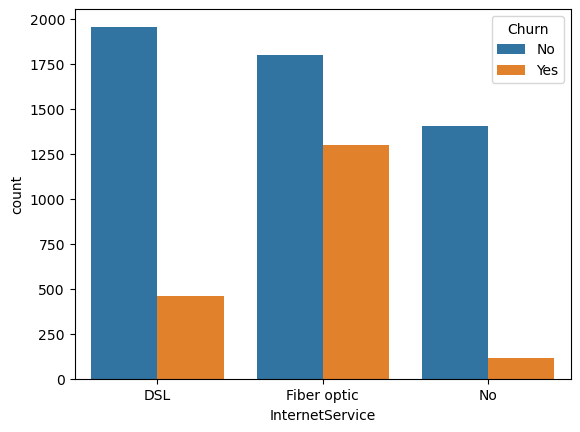

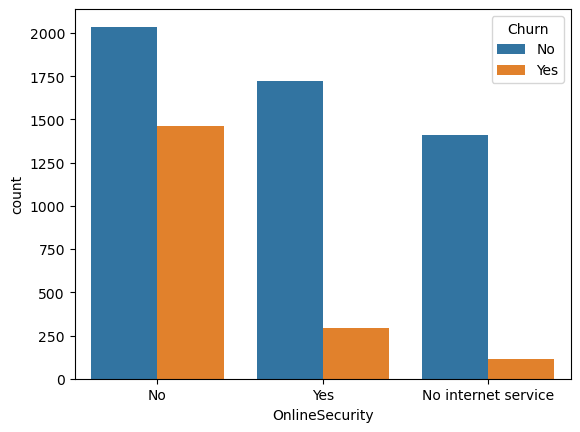

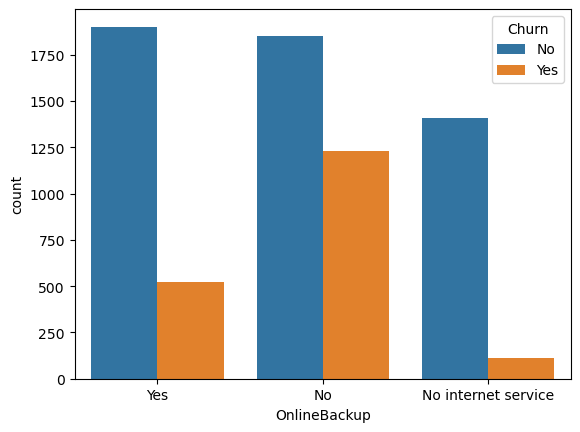

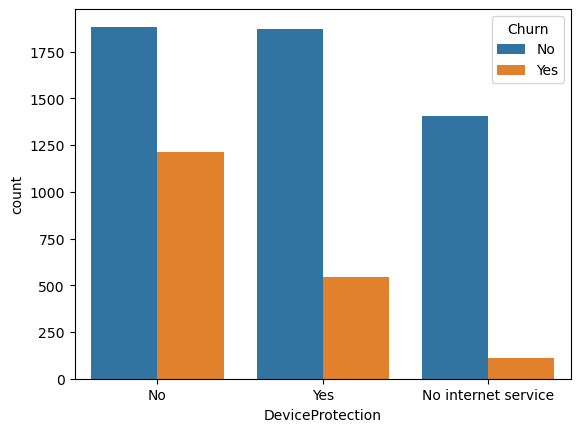

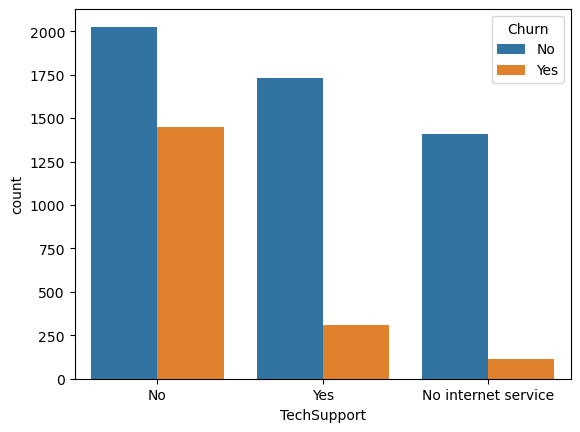

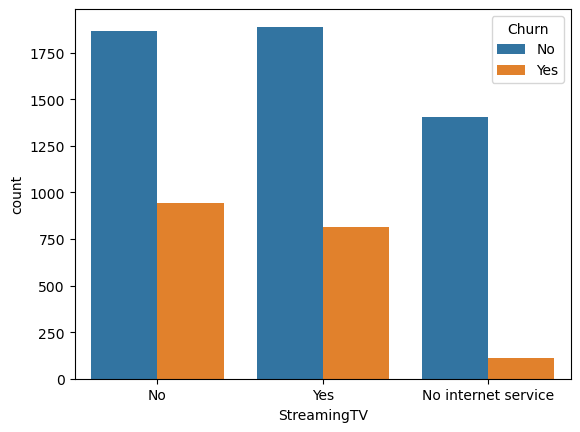

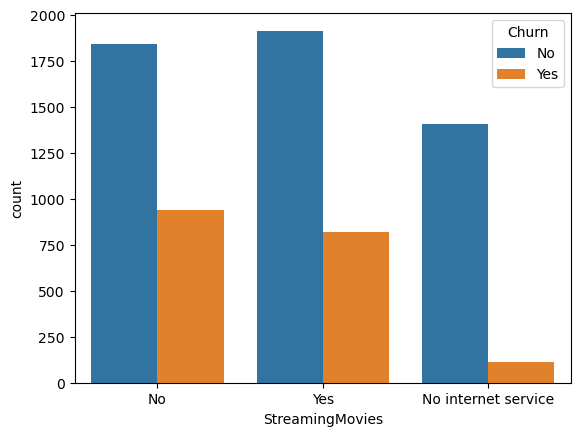

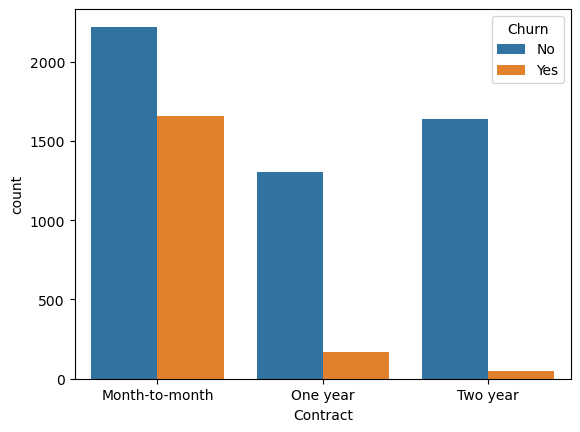

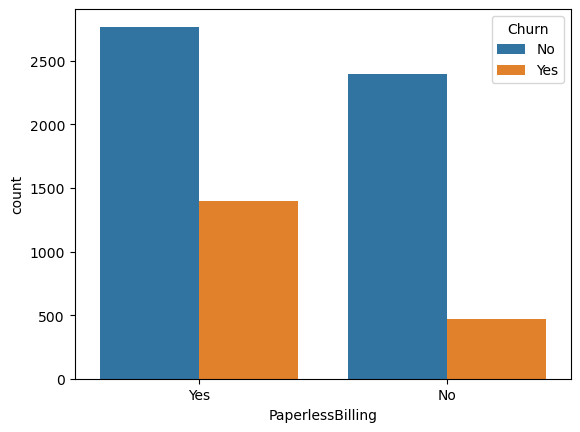

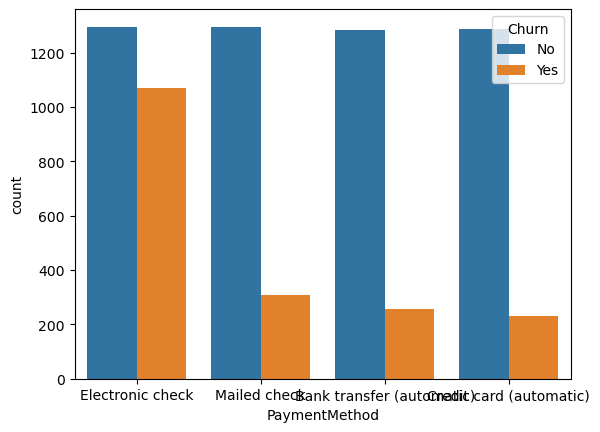

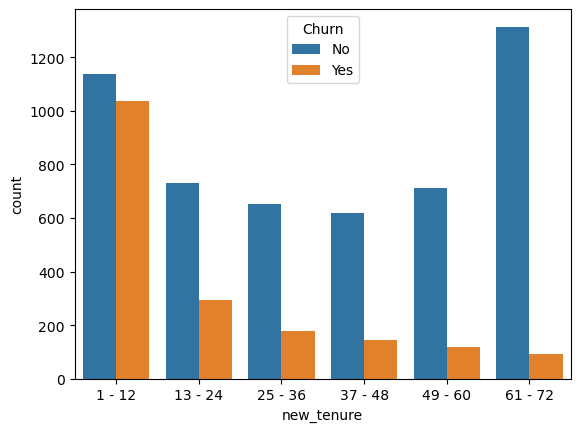

In [41]:
for i, predictor in enumerate(tele_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tele_data, x=predictor,hue='Churn')

In [33]:
#2.convert a target variable churn into binary yes=1,no=0
#3. convert categorical data into dummies variable

In [43]:
tele_data['Churn']=tele_data['Churn'].map({'Yes':1,'No':0})

In [46]:
tele_data_dummies=pd.get_dummies(tele_data)

In [47]:
tele_data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,new_tenure_1 - 12,new_tenure_13 - 24,new_tenure_25 - 36,new_tenure_37 - 48,new_tenure_49 - 60,new_tenure_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


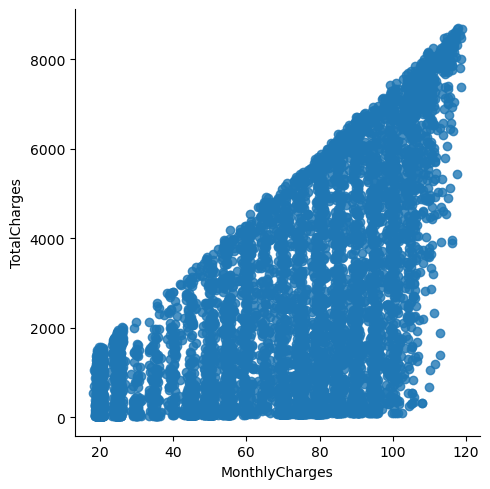

In [49]:
# relation in monthly and total charges
sns.lmplot(data=tele_data_dummies, x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Text(0.5, 0, 'Monthly Charges')

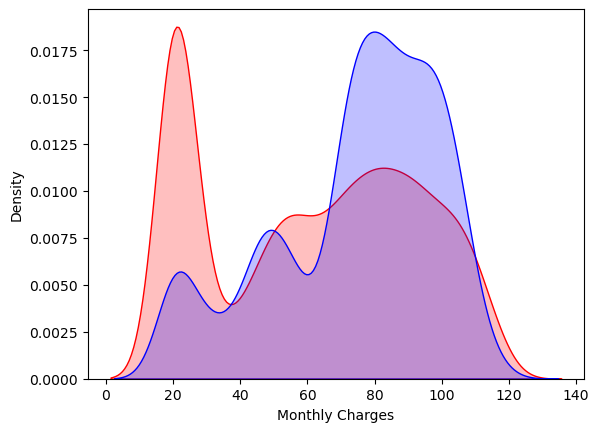

In [54]:
z=sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data['Churn']==0)],color='red',shade=True)
z=sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data['Churn']==1)], ax= z,color='blue',shade=True)
#z.legends(["No Churn","Churn"],loc='upper right')
z.set_ylabel('Density')
z.set_xlabel('Monthly Charges')
#z.set_title("Monthly charges by churn")

In [ ]:
#insights churn is high when monthly charge is high,high churn at lower total charges
#if we check 3 parameter high Monthlycharge low tenure low total charge are linked to high churn


Text(0.5, 0, 'Monthly Charges')

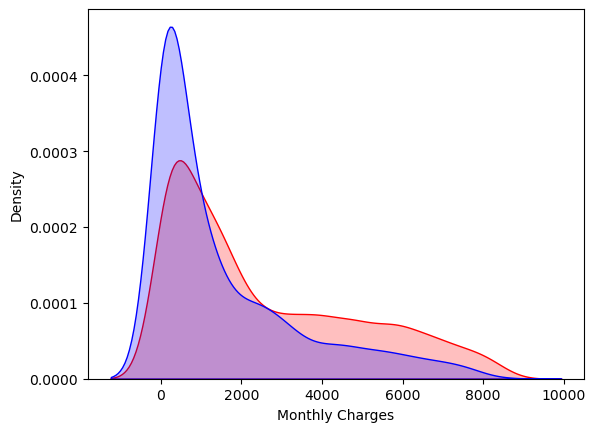

In [53]:
T=sns.kdeplot(tele_data_dummies.TotalCharges[(tele_data['Churn']==0)],color='red',shade=True)
T=sns.kdeplot(tele_data_dummies.TotalCharges[(tele_data['Churn']==1)], ax= T,color='blue',shade=True)
#T.legends(["No Churn","Churn"],loc='upper right')
T.set_ylabel('Density')
T.set_xlabel('Monthly Charges')
#T.set_title("Monthly charges by churn")

<AxesSubplot:>

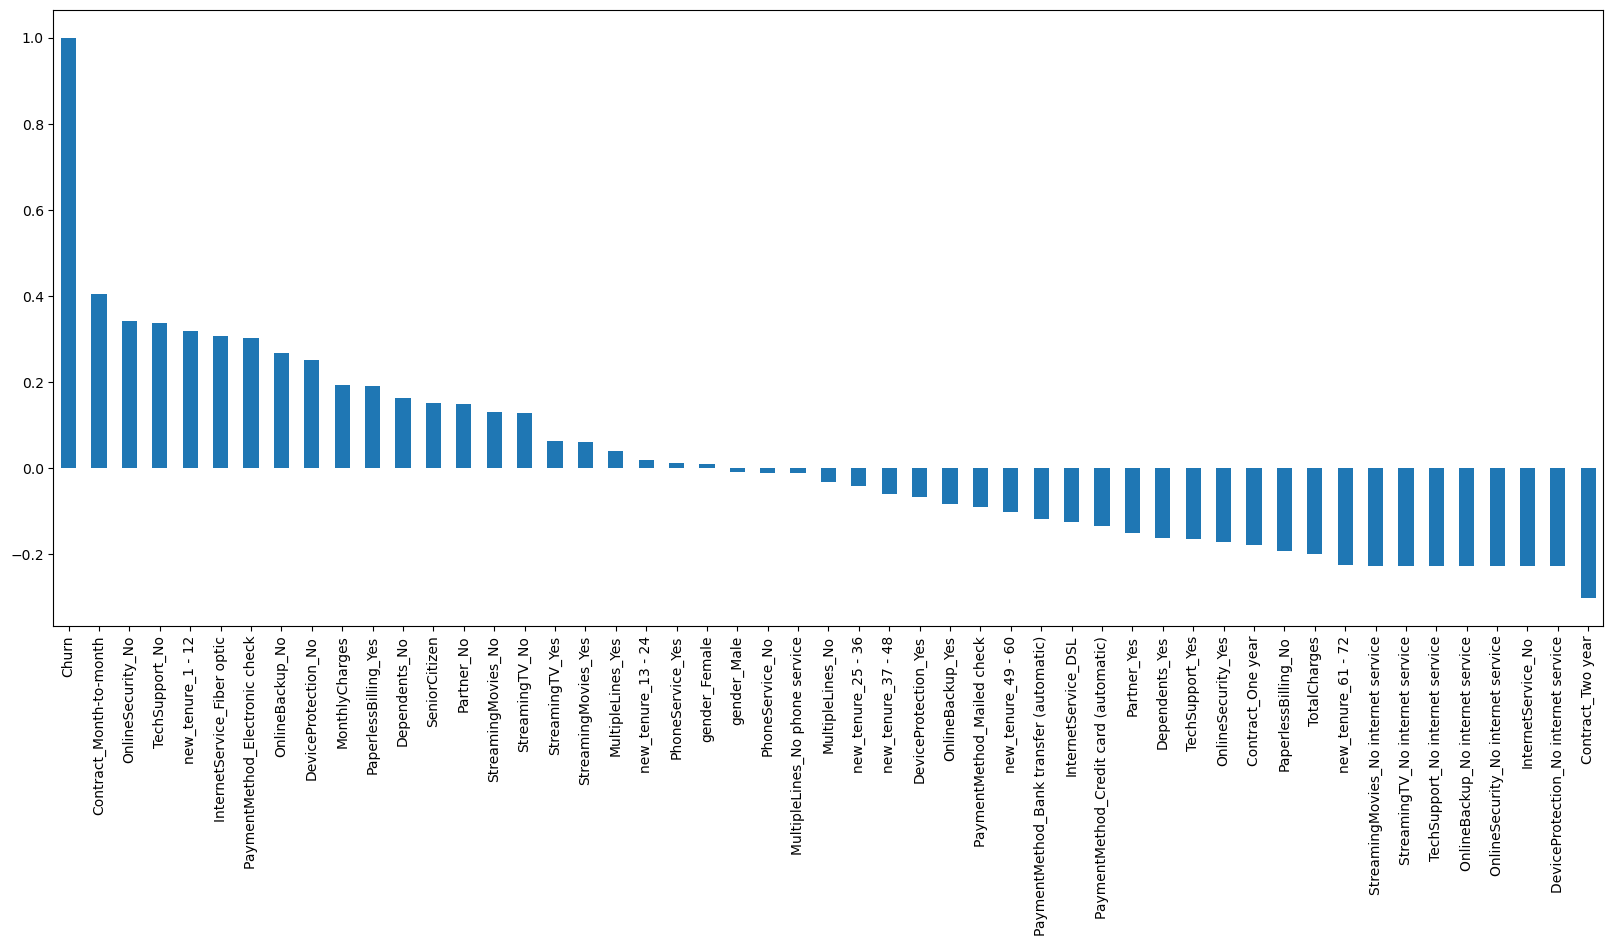

In [55]:
#build a correlation of all predictions with churn
plt.figure(figsize=(20,8))
tele_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

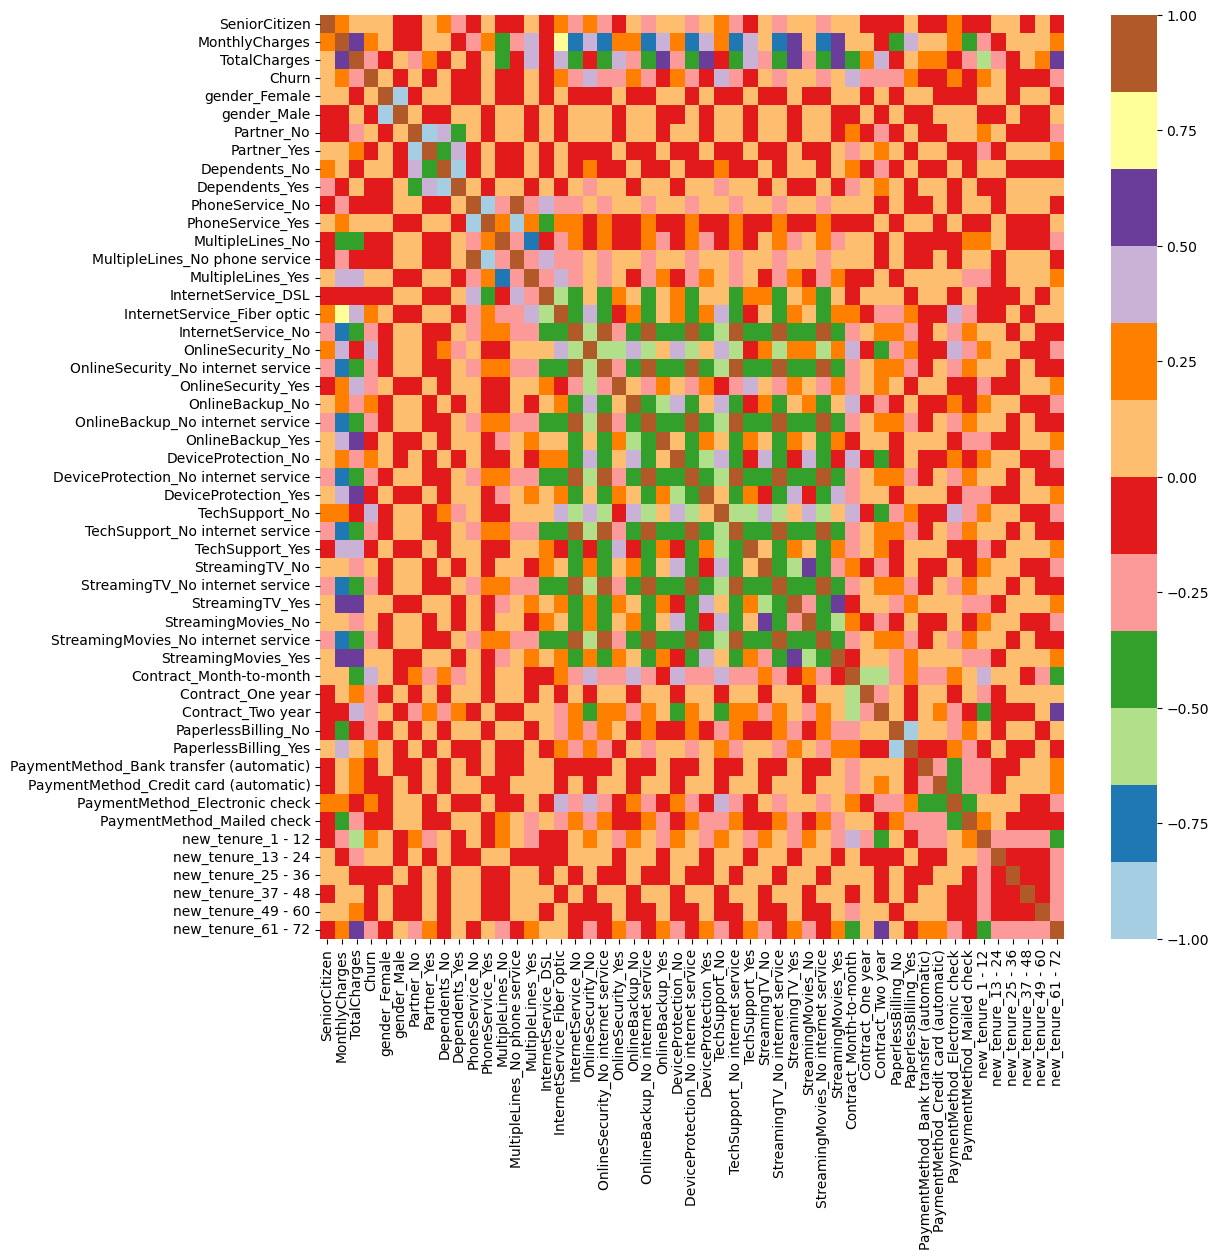

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(tele_data_dummies.corr(), cmap="Paired")

In [ ]:
z=sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data['Churn']==0)],color='red',shade=True)
z=sns.kdeplot(tele_data_dummies.MonthlyCharges[(tele_data['Churn']==1)]

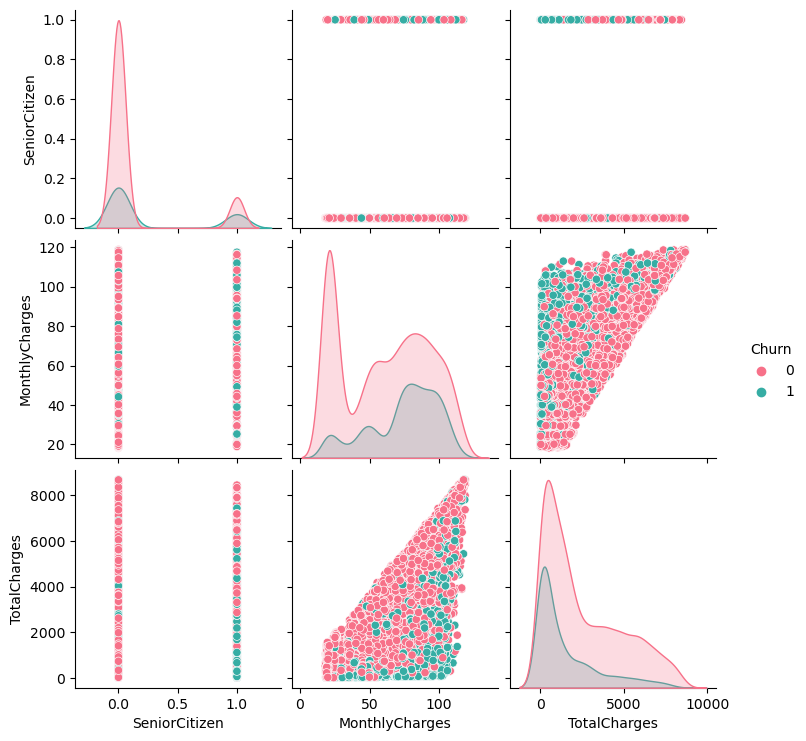

In [59]:
sns.pairplot(tele_data,hue='Churn',diag_kind='kde',kind='scatter',palette='husl')

In [ ]:
#Conclusion:
#    1.Electronics check medium r highest churners
#    2.contract type monthly customer r more like to churn free to go
#    3.no online no security r high churners,non senior citizen r high churnere

In [60]:
tele_data_dummies.to_csv('tel_churn.csv')